In [1]:
import pandas as pd
import seaborn as sns

import pandas as pd 
import wandb
api = wandb.Api()

data_name = 'norman2019'

# Project is specified by <entity/project-name>
runs = api.runs("kexinhuang/pert_gnn_simulation_" + data_name)

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

In [2]:
run = 6
pertnet_runs = ['pertnet_baseline_' + str(i) for i in range(1, run)]
no_graph_runs = ['pertnet_no_graph_' + str(i) for i in range(1, run)]
no_perturb_graph_runs = ['pertnet_no_perturb_graph_' + str(i) for i in range(1, run)]
no_gene_graph_runs = ['pertnet_no_gene_graph_' + str(i) for i in range(1, run)]
no_cross_gene_runs = ['pertnet_no_cross_gene_' + str(i) for i in range(1, run)]
no_gene_specific_runs = ['pertnet_no_gene_specific_' + str(i) for i in range(1, run)]
no_l2_runs = ['pertnet_l2_' + str(i) for i in range(1, run)]

In [3]:
res_df = runs_df[runs_df.name.isin(pertnet_runs + no_graph_runs + no_perturb_graph_runs + \
                                   no_gene_graph_runs + no_cross_gene_runs + no_gene_specific_runs + no_l2_runs)]

In [4]:
def normalize_name(x):
    if x in pertnet_runs:
        return 'GEARS'
    elif x in no_graph_runs:
        return 'No Graph'
    elif x in no_perturb_graph_runs:
        return 'No GO Graph'
    elif x in no_gene_graph_runs:
        return 'No Co-Express Graph'
    elif x in no_cross_gene_runs:
        return 'No Cross-gene'
    elif x in no_gene_specific_runs:
        return 'No Gene-specific Decoder'
    elif x in no_l2_runs:
        return 'MSE Loss'

In [5]:
res_df.summary.values[0]

{'test_ADDITIVE_pearson_delta_top50_de': 0.6279977182768589,
 'test_SYNERGY_DISSIMILAR_PHENO_mse_top100_de': 0.11062490195035934,
 'test_SUPPRESSOR_frac_correct_direction_top20_non_zero': 0.73,
 'train_de_pearson': 0.8954752759921105,
 'test_unseen_single_r2': 0.9747313505914598,
 'test_EPISTASIS_mse_top50_de': 0.41957393288612366,
 'test_unseen_single_pearson_top20_de': 0.8804940928316451,
 'test_combo_seen1_pearson_top20_de_non_dropout': 0.8649247988879932,
 'test_combo_seen1_frac_0/1_direction_top20_non_dropout': 0,
 'test_pearson_delta_top20_de': 0.5752528778172994,
 'test_SUPPRESSOR_mse_top100_de': 0.06869688630104065,
 'test_combo_seen1_frac_correct_direction_all': 0.3970882744950616,
 'test_combo_seen1_frac_in_range_40_60_non_zero': 0.10603448275862072,
 'test_combo_seen1_pearson_top20_de': 0.7837690786555281,
 'test_SYNERGY_SIMILAR_PHENO_mse_top50_de': 0.2624592185020447,
 'test_combo_seen2_fold_change_gap_downreg_0.1': 'NaN',
 'test_frac_correct_direction_20_nonzero': 0.851199

In [6]:
metrics = [
           'test_frac_sigma_below_1_non_dropout', 
           'test_frac_opposite_direction_top20_non_dropout',
           'test_mse_top20_de_non_dropout', 
           'test_pearson_delta'
          ]
metrics_name_map = {
                    'test_frac_opposite_direction_top20_non_dropout': '% of Top 20 DE Genes with Opposite Direction',
                   'test_frac_sigma_below_1_non_dropout': '% of STD <1',
                   'test_mse_top20_de_non_dropout': 'Top 20 DE MSE',
                   'test_pearson_delta': 'Pearson Correlation Across All Genes'}
out = {}
out['method'] = [normalize_name(i) for i in res_df.name.values]
for m in metrics:
    out[metrics_name_map[m]] = res_df.summary.apply(lambda x: x[m])
    

In [7]:
metrics = ['test_combo_seen2_mse_top20_de_non_dropout',
          'test_combo_seen1_mse_top20_de_non_dropout',
          'test_unseen_single_mse_top20_de_non_dropout',
          'test_combo_seen0_mse_top20_de_non_dropout'
          ]
metrics_name_map = {'test_combo_seen2_mse_top20_de_non_dropout': '2/2 Seen',
                   'test_combo_seen1_mse_top20_de_non_dropout': '1/2 Seen',
                   'test_combo_seen0_mse_top20_de_non_dropout': '0/2 Seen',
                   'test_unseen_single_mse_top20_de_non_dropout': '0/1 Seen'}
out = {}
out['method'] = [normalize_name(i) for i in res_df.name.values]
for m in metrics:
    out[metrics_name_map[m]] = res_df.summary.apply(lambda x: x[m])
    

In [8]:
import seaborn as sns
from matplotlib import font_manager
import matplotlib.pyplot as plt

font_dirs = ["./"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
sns.set( font = "Helvetica" )

sns.set(rc={'figure.figsize':(10,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.5)

color_pal = {
'PertNet': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)
}

In [9]:
import matplotlib.pyplot as plt


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


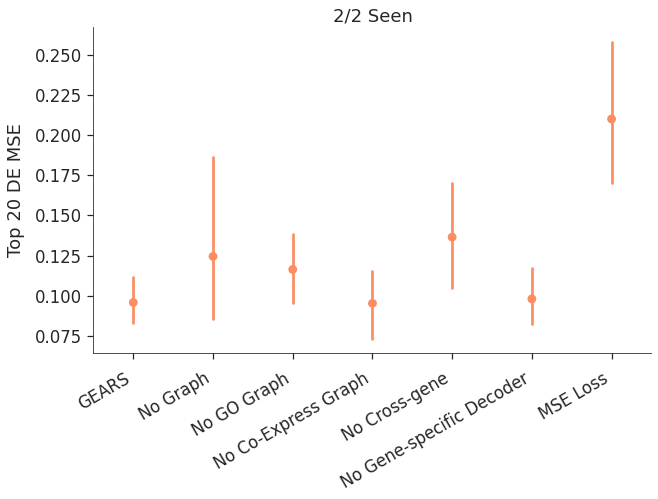

In [21]:
category = '2/2 Seen'
g = sns.pointplot('method', category, 
    data=pd.DataFrame(out), 
    order = ['GEARS', 'No Graph', 'No GO Graph', 'No Co-Express Graph', 'No Cross-gene', 'No Gene-specific Decoder', 'MSE Loss'], 
    color = (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
    #hue = 'method',
    #palette=pal_order,              
    dodge=True, 
    join=False)
sns.despine()
#g.legend_.remove()
g.set(xlabel=None, title = category)

plt.ylabel("Top 20 DE MSE",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
g.spines['left'].set_linewidth(0.8)
g.spines['bottom'].set_linewidth(0.8)
plt.xticks(
    rotation=30, 
    horizontalalignment='right'
)
plt.savefig('ablation_mse_'+category.replace('/','_')+'.svg', bbox_inches='tight')


/dfs/user/kexinh/miniconda3/envs/a100_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


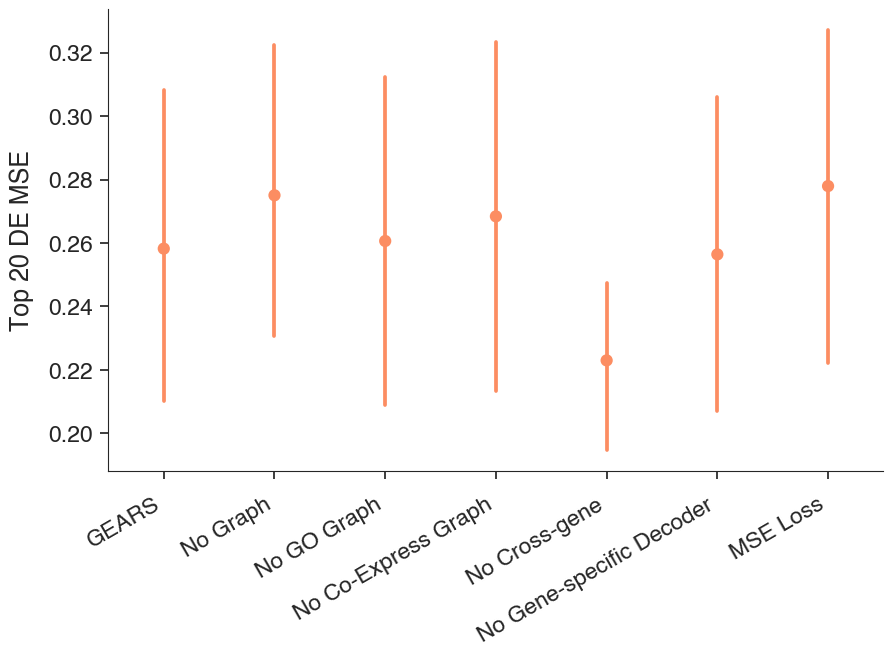

In [14]:
g = sns.pointplot('method', 'Top 20 DE MSE', 
    data=pd.DataFrame(out), 
    order = ['GEARS', 'No Graph', 'No GO Graph', 'No Co-Express Graph', 'No Cross-gene', 'No Gene-specific Decoder', 'MSE Loss'], 
    color = (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
    #hue = 'method',
    #palette=pal_order,              
    dodge=True, 
    join=False)
sns.despine()
#g.legend_.remove()
g.set(xlabel=None)

plt.ylabel("Top 20 DE MSE",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
g.spines['left'].set_linewidth(0.8)
g.spines['bottom'].set_linewidth(0.8)
plt.xticks(
    rotation=30, 
    horizontalalignment='right'
)
plt.savefig('ablation_mse_unseen_single.pdf', bbox_inches='tight')


/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


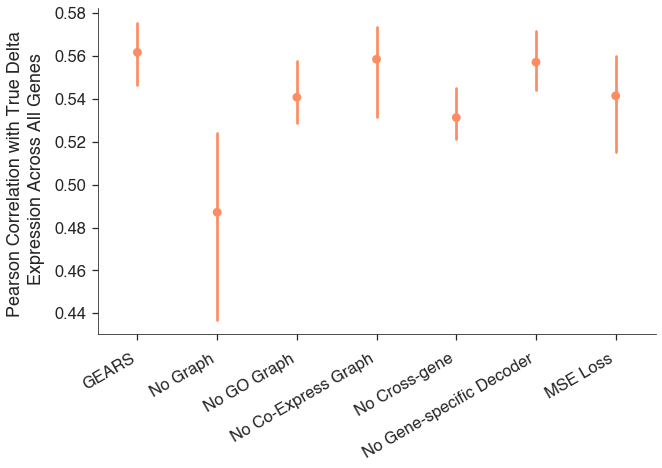

In [11]:
g = sns.pointplot('method', 'Pearson Correlation Across All Genes', 
    data=pd.DataFrame(out), 
    order = ['GEARS', 'No Graph', 'No GO Graph', 'No Co-Express Graph', 'No Cross-gene', 'No Gene-specific Decoder', 'MSE Loss'], 
    color = (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
    #hue = 'method',
    #palette=pal_order,              
    dodge=True, 
    join=False)
sns.despine()
#g.legend_.remove()
g.set(xlabel=None)

plt.ylabel("Pearson Correlation with True Delta \n Expression Across All Genes",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
g.spines['left'].set_linewidth(0.8)
g.spines['bottom'].set_linewidth(0.8)
plt.xticks(
    rotation=30, 
    horizontalalignment='right'
)
plt.savefig('ablation_pearson.pdf', bbox_inches='tight')


/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


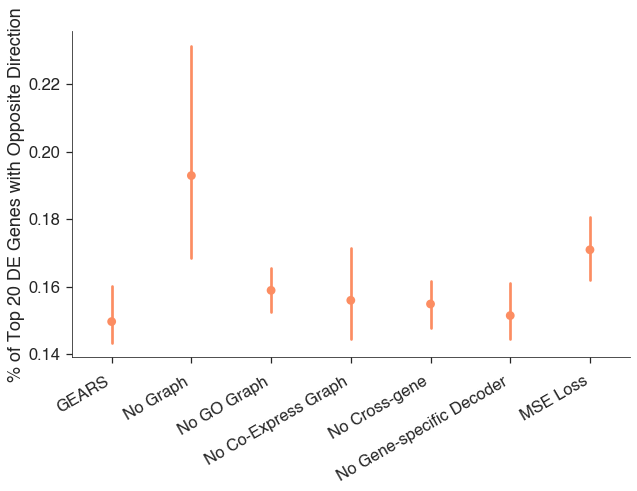

In [12]:
g = sns.pointplot('method', '% of Top 20 DE Genes with Opposite Direction', 
    data=pd.DataFrame(out), 
    order = ['GEARS', 'No Graph', 'No GO Graph', 'No Co-Express Graph', 'No Cross-gene', 'No Gene-specific Decoder', 'MSE Loss'], 
    color = (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
    #hue = 'method',
    #palette=pal_order,              
    dodge=True, 
    join=False)
sns.despine()
#g.legend_.remove()
g.set(xlabel=None)

plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
g.spines['left'].set_linewidth(0.8)
g.spines['bottom'].set_linewidth(0.8)
plt.xticks(
    rotation=30, 
    horizontalalignment='right'
)
plt.savefig('ablation_direction.pdf', bbox_inches='tight')


/dfs/user/kexinh/miniconda3/envs/eee/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


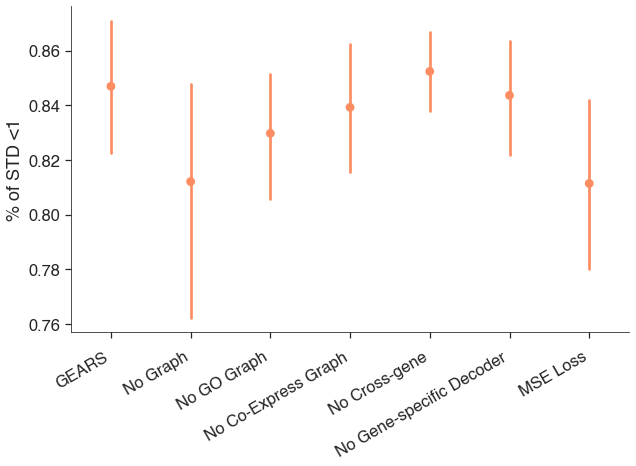

In [13]:
g = sns.pointplot('method', '% of STD <1', 
    data=pd.DataFrame(out), 
    order = ['GEARS', 'No Graph', 'No GO Graph', 'No Co-Express Graph', 'No Cross-gene', 'No Gene-specific Decoder', 'MSE Loss'], 
    color = (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
    #hue = 'method',
    #palette=pal_order,              
    dodge=True, 
    join=False)
sns.despine()
#g.legend_.remove()
g.set(xlabel=None)

plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
g.spines['left'].set_linewidth(0.8)
g.spines['bottom'].set_linewidth(0.8)
plt.xticks(
    rotation=30, 
    horizontalalignment='right'
)
plt.savefig('ablation_std.pdf', bbox_inches='tight')
